## Technohacks Intern Task -1


## Customer Churn Prediction </span>
</br>

#### Project Overview: </span>
In this project, we're diving into the world of customer behavior to predict when customers might decide to leave a service, like switching phone carriers. We're using a cool technique called logistic regression to make these predictions. The dataset we're working with has all sorts of info about these customers, like how long they've been with the service, their monthly charges, and more. Our goal is to build a smart model that can tell us which customers might leave, so we can try to keep them around.

### Importing the Dependencies </span>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import seaborn as sns

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Data Preprocessing </span>

In [2]:
# Load and preprocess data
df = pd.read_csv('churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.drop('customerID', axis=1, inplace=True)
object_columns = df.select_dtypes(include=['object']).columns.to_list()
df = pd.get_dummies(df, columns = object_columns, drop_first=True)

In [4]:
# Split data
X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### <span style="color:#f16e64;font-weight:700;font-size:20px">
### Train and Evaluate Model </span>

### Logistic Regression 

In [5]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

In [6]:
# Calculate and display accuracy
accuracy = log_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8090844570617459


### ROC Curve (AUC-ROC)

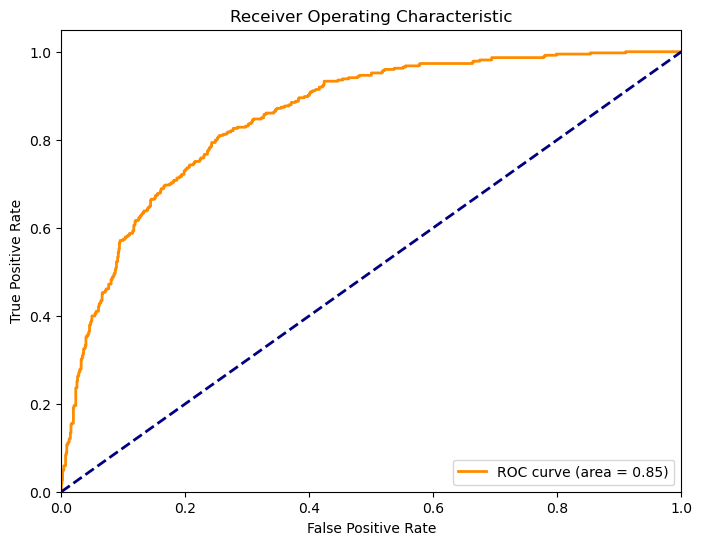

In [7]:
# Get predicted probabilities for positive class
y_prob = log_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### Confusion Matrix

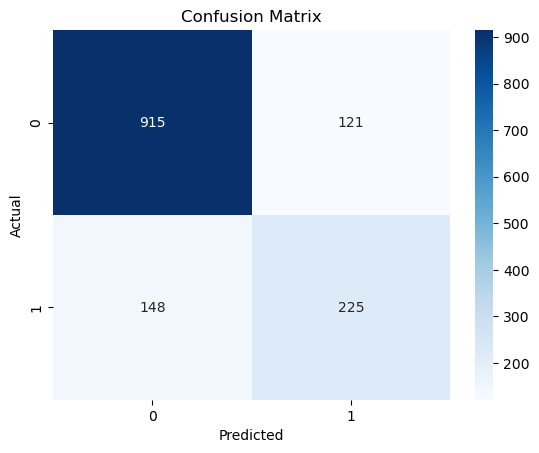

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier
# Create a Decision Tree model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

In [10]:
# Calculate and display accuracy
accuracy = tree_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7764371894960965


### ROC Curve (AUC-ROC)

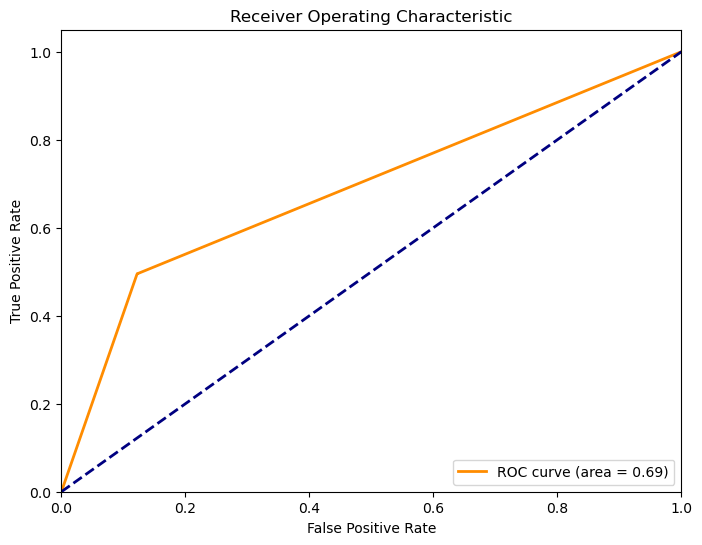

In [11]:
# Get predicted probabilities for positive class
y_prob = tree_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### Confusion Matrix

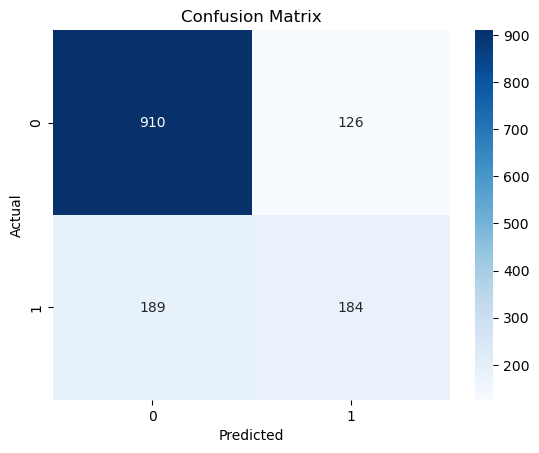

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [14]:
# Calculate and display accuracy
accuracy = rf_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.794180269694819


### ROC Curve (AUC-ROC)

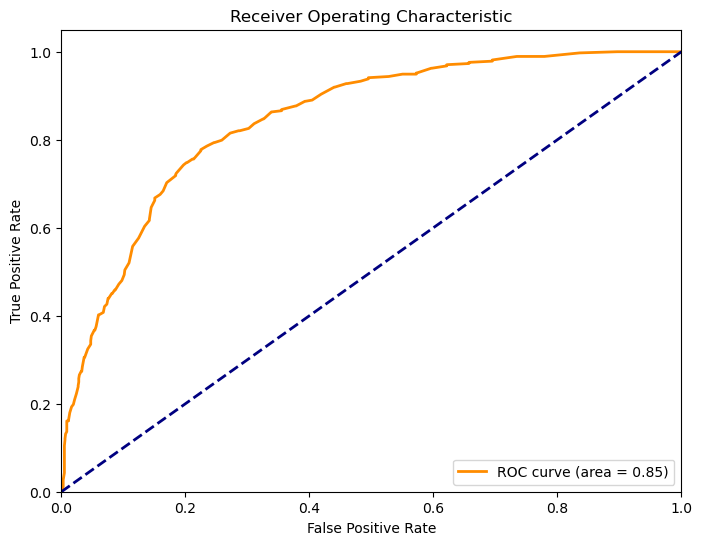

In [15]:
# Get predicted probabilities for positive class
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### Confusion Matrix

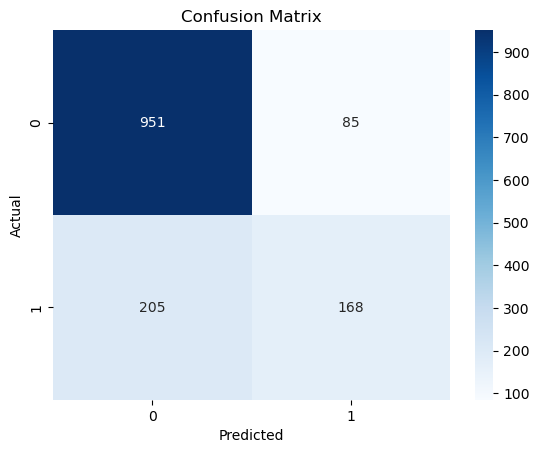

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Accuracy for all three models

In [17]:
from sklearn.metrics import accuracy_score

accuracy_lr = accuracy_score(y_test, y_pred)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_tree = accuracy_score(y_test, y_pred_tree)

print(f"Decision Tree Accuracy: {accuracy_lr}")
print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"SVM Accuracy: {accuracy_tree}")


Decision Tree Accuracy: 0.8090844570617459
Random Forest Accuracy: 0.794180269694819
SVM Accuracy: 0.7764371894960965


### Classification Report 

In [18]:
from sklearn.metrics import classification_report

# Decision Tree
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred))

# Random Forest
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

# SVM
print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred_tree))


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1036
           1       0.65      0.60      0.63       373

    accuracy                           0.81      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1036
           1       0.66      0.45      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1036
           1       0.59      0.49      0.54       373

    accuracy                           0.78      1409